# Pengenalan TensorFlow

### Rumus Konversi suhu dari celcius ke Fahrenheit 

$$ f = c \times 1.8 + 32 $$

Tentu saja di pendekatan tradisional software engineering, rumus ini cukup simpel untuk di implementasi sebagai fungsi yang langsung melakukan konversi nilai dari celcius ke fahrenheit. Tapi tidak demikian dengan machine learning.

Kita perlu memberikan beberapa sampel nilai celcius sebagai training data dan juga beberapa sampel nilai fahrenheit sebagai label / output.

Kemudian, kita akan membuat simpel deep learning model yang merefleksikan rumus di atas melalui proses pelatihan.

## Import dependencies

In [1]:
import tensorflow as tf
import numpy as np

## Mempersiapkan Training data

Kita perlu mempersiapkan Feature sebagai input dan label sebagai output yang akan di pelajari oleh model Machine Learning kita.

In [2]:
nilai_celcius    = np.array([-100, -40, -10,  0, 10, 40, 80,  100],  dtype=float)
nilai_fahrenheit = np.array([-148, -40, 14, 32, 50, 104, 176, 212],  dtype=float)

for i,c in enumerate(nilai_celcius):
  print("{} derajat Celcius = {} derajat Fahrenheit".format(c, nilai_fahrenheit[i]))

-100.0 derajat Celcius = -148.0 derajat Fahrenheit
-40.0 derajat Celcius = -40.0 derajat Fahrenheit
-10.0 derajat Celcius = 14.0 derajat Fahrenheit
0.0 derajat Celcius = 32.0 derajat Fahrenheit
10.0 derajat Celcius = 50.0 derajat Fahrenheit
40.0 derajat Celcius = 104.0 derajat Fahrenheit
80.0 derajat Celcius = 176.0 derajat Fahrenheit
100.0 derajat Celcius = 212.0 derajat Fahrenheit


### Machine Learning terminology

 - **Feature** — Training data yang menjadi input ke model machine learning kita. Pada kasus ini adalah sebuah nilai di dalam array — derajat Celcius.

 - **Labels** — yang menjadi output yang akan model prediksi. Pada kasus ini adalah sebuah nilai di dalam array — derajat Fahrenheit.

 - **Example** — Sepasang inputs/outputs yang di gunakan dalam training. Pada kasus ini adalah sepasang nilai celcius dan fahrenheit pada spesifik index, contohnya (0, 32).


## Membuat Machine Learning model sederhana

Selanjutnya, kita bisa membuat model. Kita akan membuat model sesimple mungkin dengan menggunakan satu jaringan Dense. Dense layers disini bisa merepresentasikan 1 FC layers atau hanya sebuah neuron tergantung dari unitsnya.


### Membuat Layer

kita definisikan layer pertama kita dengan `layer_1` dan buat dengan memanggil fungsi `tf.keras.layers.Dense` dengan konfigurasi sebagai berikut:

*   `input_shape=[1]` — parameter ini untuk mendefinisikan bagaimana bentuk dimensi dari input. Pada kasus ini, input layer hanya memerlukan nilai tunggal dengan dimensi 1 dimensional array dengan 1 member value yang mempunyai tipe float.

*   `units=1` — parameter units mendefinisikan jumlah neurons pada layer. Jumlah neuron berarti jumlah variabel internal di dalam layer yang harus di pelajari. Di multi-layered network, kita harus mendefinisikan size and shape sesuai dengan input_shape pada layer selanjutnya.

In [3]:
layer_1 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Menggabung layer ke dalam model

ketika kita sudah mendefinisikan layer, layer-layer tersebut harus di gabung ke dalam model.

Sequential model mengambil list of layers sebagai argument. Urutan kalkulasi di mulai dari index 0 ke index x, merepresantasikan input ke output.

In [5]:
model = tf.keras.Sequential([layer_1])

**Variasi mendefinisikan model**

**Variasi 2**
```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

**Variasi 3**
```python
model = tf.keras.Sequential()
model.add(layer_1)
```


## Compile the model, menggunakan loss dan optimizer functions

Sebelum melakukan training, model harus di compile. Parameter yang perlu di definisikan adalah:

- **Loss function** — Parameter untuk mengukur sejauh mana prediksi yang di hasilkan oleh model dibandingkan oleh output yang diharapkan. Perbedaannya di sebut "loss". Misalkan hasil yang di harapkan adalah 20, tetapi ternyata yang dihasilkan model adalah 18, maka nilai loss adalah 2.

- **Optimizer function** — Parameter untuk menyesuaikan internal values dengan tujuan untuk mengurangi loss. Salah satu optimizer yang populer adalah Adam Optimizer.

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Setelah meng-compile model, yang akan di gunakan selanjutnya adalah `model.fit()` untuk mengkalkulasi loss di setiap epoch. Epoch adalah berapa jumlah training cycle yang di lakukan.

`model.fit()` inilah yang disebut dengan Training, aktifitas dimana mengkalkulasi current loss dari sebuah model dan memperbaiki (improve) akurasi dan mengurangi loss.

Selama Training, optimizer function di gunakan untuk memperbaiki internal variabel pada model. Tujuannya adalah dari mengatur internal variabel sampai model bisa meniru rumus asli dari mengkonversi Celcius ke Fahrenheit. 

TensorFlow menggunakan analisa numerik dan Gradient Descent Algorithm untuk melakukan perbaikan internal variabel. Semua kompleksitas sudah di tangani oleh TensorFlow. Jadi kita tidak membahas terlalu detail disisni.

Yang perlu di perhatikan adalah learning rate. learning rate menentukan besaran langkah (step size) ketika melakukan training. Jika nilainya terlalu kecil, langkah yang di ambil akan semakin kecil dan memerlukan banyak iterasi untuk training model. Jika nilainya terlalu besar, akurasi akan menurun. Mencari value yang cocok memerlukan beberapa trial and error. Tapi biasanya rangenya berada dari 0.001 sampai ke 0.1

## Train the model

Training model dengan menggunakan `fit` method.

Selama training, model mengambil nilai celcius, dan melakukan kalkulasi menggunakan internal variabel yang di sebut "weights/bobot" dan memberikan nilai output yang di harapkan sama dengan nilai Fahrenheit yang sebenarnya.

Bobot di neuron di inisiasi secara random dan pada awalnya nilai output tidak akan dekat dengan nilai yang sebenarnya. Perbedaan dari nilai keluaran dengan nilai yang sebenarnya di kalkulasikan menggunakan fungsi loss dan fungsi optimizer yang mengarahkan bagaimana bobot di sesuaikan.

Argument epoch menspesifikasi seberapa banyak siklus training yang harus di jalankan dan `verbose` argument memvisualisasikan sebanyak apa epoch dari training yang di produksi.

In [7]:
history = model.fit(nilai_celcius, nilai_fahrenheit, epochs=500, verbose=1)
print("Selesai Training")

Train on 8 samples
Epoch 1/500
8/8 [==============================] - 0s 54ms/sample - loss: 1147.5074
Epoch 2/500
8/8 [==============================] - 0s 516us/sample - loss: 1028.3411
Epoch 3/500
8/8 [==============================] - 0s 469us/sample - loss: 984.3100
Epoch 4/500
8/8 [==============================] - 0s 346us/sample - loss: 994.6277
Epoch 5/500
8/8 [==============================] - 0s 2ms/sample - loss: 1015.9786
Epoch 6/500
8/8 [==============================] - 0s 417us/sample - loss: 1017.7230
Epoch 7/500
8/8 [==============================] - 0s 4ms/sample - loss: 999.7678
Epoch 8/500
8/8 [==============================] - 0s 259us/sample - loss: 974.3634
Epoch 9/500
8/8 [==============================] - 0s 336us/sample - loss: 952.9153
Epoch 10/500
8/8 [==============================] - 0s 1ms/sample - loss: 941.5494
Epoch 11/500
8/8 [==============================] - 0s 206us/sample - loss: 939.9695
Epoch 12/500
8/8 [==============================] - 0s 4ms

## Memvisualisasikan statistik training

`fit` method mengembalikan sebuah history object/dictionary. Kita bisa menggunakan dictionary ini untuk membuat plot bagaimana nilai loss dari model kita menurun setiap training epoch. Nilai loss yang besar berarti prediksi model kita jauh dari nilai Fahrenheit sesungguhnya.

Untuk memvisualisasikannya kita menggunakan library Matplotlib. 

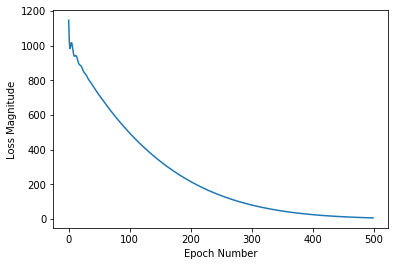

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Saatnya predict the future!
### Menggunakan model yang sudah di training untuk memprediksi nilai.

In [10]:
print(model.predict([85]))

[[182.96207]]


Nilai Fahrenheit yang benar adalah is $85 \times 1.8 + 32 = 185$, dan model kita sudah doing well

### Ulasan


*   Kita membuat model dengan menggunakan Dense Layer
*   Kita training model dengan 3500 examples (7 pairs, melalui 500 epochs).

Model kita dalam prosesnya menyesuaikan variabel bobot di Dense layer sampai bisa mengeluarkan nilai yang benar dan mendekati kebenaran untuk apapun nilai input celcius yang dimasukkan.

## Melihat bobot pada lapisan Dense

In [11]:
print("Ini adalah internal variabel di dalam Dense Layer: {}".format(layer_1.get_weights()))

Ini adalah internal variabel di dalam Dense Layer: [array([[1.8070972]], dtype=float32), array([29.358816], dtype=float32)]


Variabel pertama sangat mendekati ~1.8 dan yang kedua mendekati ~32. Nilai ini sudah mendekati dari nilai pada rumus konversi.

Rumus dari Neural Network sangat mirip dari rumus konversi celcius ke Fahrenheit ($y = mx + b$), dimana mempunyai bentuk yang sama dengan rumus $f = 1.8c + 32$.



## Credits (Reference)

> - [Udacity TensorFlow](https://classroom.udacity.com/courses/ud187)
> - [Lex Fridman's MIT Deep Learning](https://github.com/lexfridman/mit-deep-learning)
> - [Aymeric Damien](https://github.com/aymericdamien/)
> - [GitHub Awesome Lists Topic](https://github.com/topics/awesome)
> * [Tensorflow Tutorial and House Price Prediction](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-examples)
> - [Boston House Price Prediction](https://www.kaggle.com/shreayan98c/boston-house-price-prediction)